#### Q1. Import and store the data in a data frame. (2.5 points)


In [1]:
import pandas as pd


In [2]:
air_data=pd.read_fwf('http://users.stat.ufl.edu/~winner/data/airq402.dat',header=None)

In [3]:
air_data.columns=['City1','City2','Average Fare','Distance',
  'Average weekly passengers',  'market leading airline','market share','Average_fare','Low price airline','Low\'s market share','price']


In [4]:
air_data

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average_fare,Low price airline,Low's market share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


#### 2. Remove the outliers from the data (5 points)

In [5]:
air_data.isna().any()

City1                        False
City2                        False
Average Fare                 False
Distance                     False
Average weekly passengers    False
market leading airline       False
market share                 False
Average_fare                 False
Low price airline            False
Low's market share           False
price                        False
dtype: bool

In [6]:
air_data.dtypes

City1                         object
City2                         object
Average Fare                 float64
Distance                       int64
Average weekly passengers    float64
market leading airline        object
market share                 float64
Average_fare                 float64
Low price airline             object
Low's market share           float64
price                        float64
dtype: object

In [7]:
print("Shape of DF before removing outliers :{}".format(air_data.shape))

Shape of DF before removing outliers :(1000, 11)


In [8]:
for k,v in air_data.dtypes.items():
    if v != 'object':
        Q1 = air_data[k].quantile(0.25)
        Q3 = air_data[k].quantile(0.75)
        IQR = Q3-Q1
        Lower_cap = Q1 - 1.5*IQR
        Higher_cap = Q3 + 1.5*IQR
        air_data=air_data[air_data[k].between(Lower_cap,Higher_cap,inclusive=False)]

In [9]:
print("Shape of DF after removing outliers :{}".format(air_data.shape))

Shape of DF after removing outliers :(877, 11)


#### Q3.Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)


In [10]:
y = air_data.iloc[:,2:3]

In [11]:
y.head()

,Average Fare
0,114.47
1,122.47
2,214.42
3,69.40
4,158.13


In [12]:
X=air_data.drop(columns='Average Fare',inplace=False)

In [13]:
X.head()

,City1,City2,Distance,Average weekly passengers,market leading airline,market share,Average_fare,Low price airline,Low's market share,price
0,CAK,ATL,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,723,313.04,UA,39.79,161.36,WN,15.34,145.42


#### Q4.Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)


In [14]:
air_data.corr().iloc[:,:1]

,Average Fare
Average Fare,1.000000
Distance,0.512280
Average weekly passengers,-0.194769
market share,-0.202205
Average_fare,0.979853
Low's market share,-0.498025
price,0.837329


In [15]:
#If negative correlation is also considered as a strong relation, we need not remove any columns
(air_data.corr().iloc[:,:1]<-0.1) | (air_data.corr().iloc[:,:1]>0.1)

,Average Fare
Average Fare,True
Distance,True
Average weekly passengers,True
market share,True
Average_fare,True
Low's market share,True
price,True


In [16]:
#If only Positive covariance is  considered as per the question
air_data.corr().iloc[:,:1]>0.1


,Average Fare
Average Fare,True
Distance,True
Average weekly passengers,False
market share,False
Average_fare,True
Low's market share,False
price,True


In [17]:
corr=air_data.corr().iloc[:,:1]>0.1

In [18]:
print("Removing the below columns:")
for k in corr.index:
    if corr.loc[k][0] == False:
        print(k)
        X.drop(columns=k,inplace=True)

Removing the below columns:
Average weekly passengers
market share
Low's market share


In [19]:
X.head()

,City1,City2,Distance,market leading airline,Average_fare,Low price airline,price
0,CAK,ATL,528,FL,111.03,FL,111.03
1,CAK,MCO,860,FL,123.09,DL,118.94
2,ALB,ATL,852,DL,223.98,CO,167.12
3,ALB,BWI,288,WN,68.86,WN,68.86
4,ALB,ORD,723,UA,161.36,WN,145.42


In [20]:
X.shape

(877, 7)

#### Q5.Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

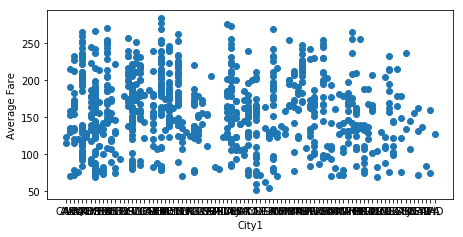

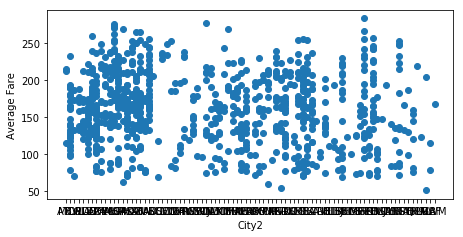

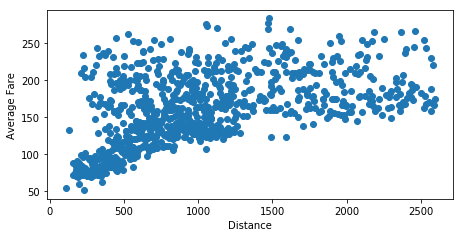

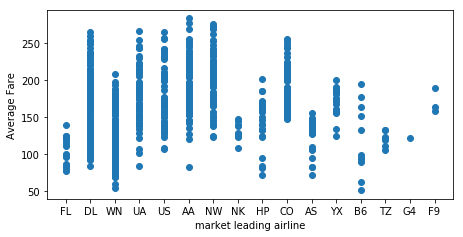

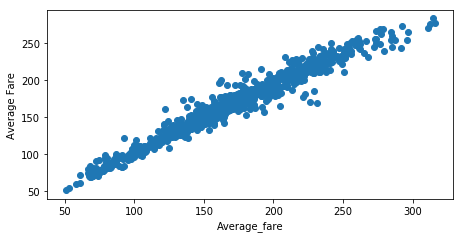

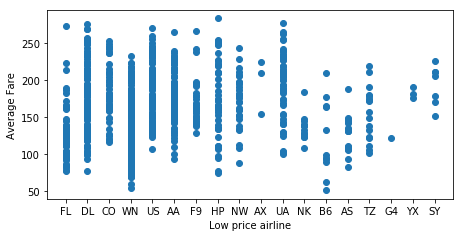

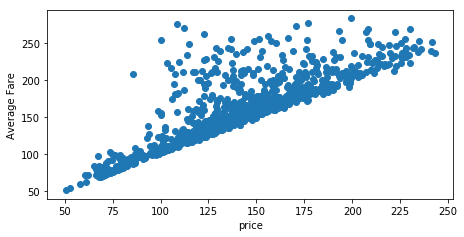

In [22]:
count=1
for i in X.columns:
    plt.subplots(figsize=(16,16))
    plt.subplot(4,2,count)
    plt.scatter(X[i],y)
    plt.xlabel(i)
    plt.ylabel(y.columns[0])
    count+=1

#### Q6.Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [24]:
#"Encoding the categorical variables to Numerical"
for i in X.select_dtypes(exclude='number'):
    le.fit(X[i])
    X[i]=le.transform(X[i])


In [25]:
X

,City1,City2,Distance,market leading airline,Average_fare,Low price airline,price
0,16,0,528,6,111.03,7,111.03
1,16,40,860,6,123.09,5,118.94
2,2,0,852,4,223.98,4,167.12
3,2,7,288,14,68.86,16,68.86
4,2,52,723,12,161.36,16,145.42
5,2,18,1204,14,137.97,5,127.69
6,2,32,2237,14,148.59,16,148.59
7,2,33,2467,4,205.06,15,174.00
8,2,40,1073,14,127.69,16,127.69
9,2,82,1130,13,132.91,5,124.78


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
#splitting data by 80:20 ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [28]:
lin_reg = LinearRegression()

In [29]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Q7. Print the coefficients & intercepts of the linear regression model (5 points)


In [30]:
coeffs = pd.DataFrame(lin_reg.coef_,columns=X.columns,index=["Coeffcient"])
print("Coefficients  of the model are :")
coeffs.T

Coefficients  of the model are :


,Coeffcient
City1,0.024884
City2,-0.024534
Distance,0.001829
market leading airline,-0.156563
Average_fare,0.769181
Low price airline,0.021088
price,0.184925


In [31]:
print("Intercept of the model is {}".format(lin_reg.intercept_))

Intercept of the model is [8.54289802]


In [32]:
#Accuracy of training data
lin_reg.score(X_train,y_train)

0.9734973260817851

In [33]:
#Accuracy of the testing data
lin_reg.score(X_test,y_test)

0.9618395682895752